# **SYED MUSTJAB HYDER**

# Project 1:
# 🍇 Wild Blueberry Yield Prediction

# **Problem Statement:**

The target feature is yield which is a continuous variable. The task is to
classify this variable based on the other 17 features step-by-step by going
through each day's task. The evaluation metrics will be RMSE score



  1-Pandas

  2-Data Exploration

  3-IQR

  4-Correlation

  5-Visualization

In [ ]:
pip install klib

In [ ]:
pip install sweetviz

In [ ]:
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("/content/WildBlueberryPollinationSimulationData.csv")
# To display the top 5 rows
df.head(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
df.tail(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


In [ ]:
# Checking the types of data
df.dtypes

Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

<Axes: >

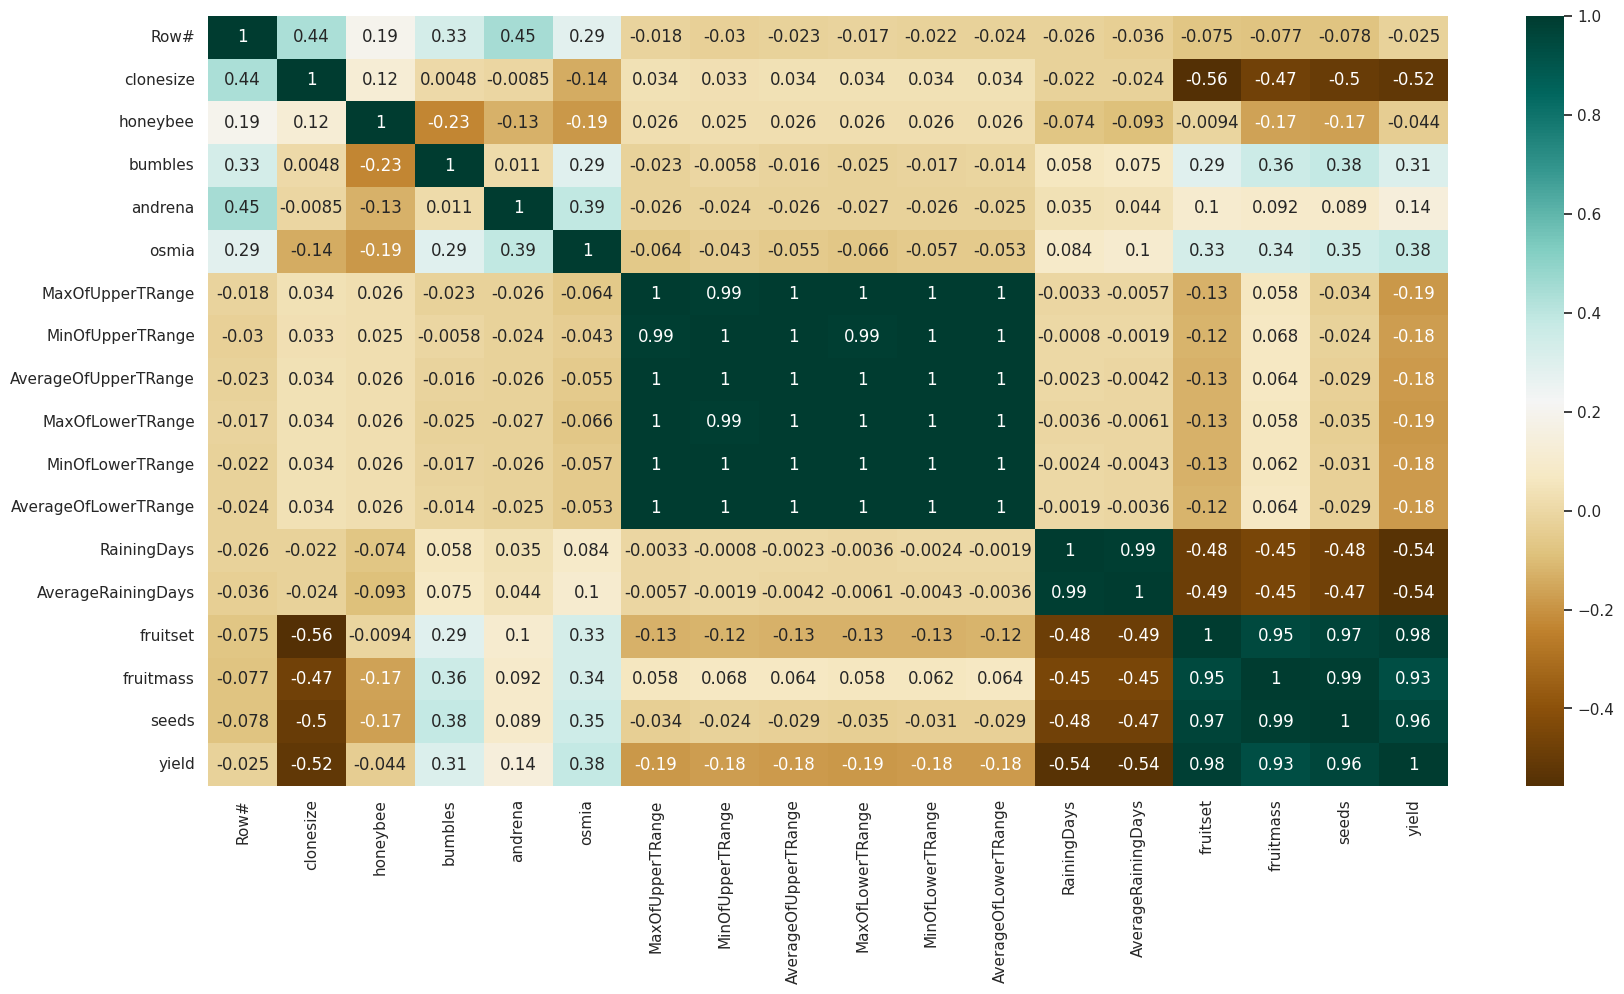

In [ ]:
# Adjusting the Size of Figure
plt.figure(figsize=(20,10))
# calculating the Correlation
correlation = df.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation

# **Data Reduction**

After the correlation and displaying heetmap it shows that MaxOfUpperTRange

MinOfUpperTRange        
AverageOfUpperTRange    
MaxOfLowerTRange        
MinOfLowerTRange        
AverageOfLowerTRange    
RainingDays
are hihgly correlated and no need to pass these features to the model. Dropping of these features have no effect on the RMSE(Root Mean Squre Error)          


In [ ]:
# Dropping irrelevant columns
df = df.drop([ 'Row#'], axis=1)
df = df.drop([ 'MaxOfUpperTRange'], axis=1)
df = df.drop([ 'MinOfUpperTRange'], axis=1)
df = df.drop([ 'MaxOfLowerTRange'], axis=1)
df = df.drop([ 'MinOfLowerTRange'], axis=1)
df = df.drop([ 'RainingDays'], axis=1)
df.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,71.9,50.8,0.39,0.354413,0.382703,28.873714,3436.493543


<Axes: >

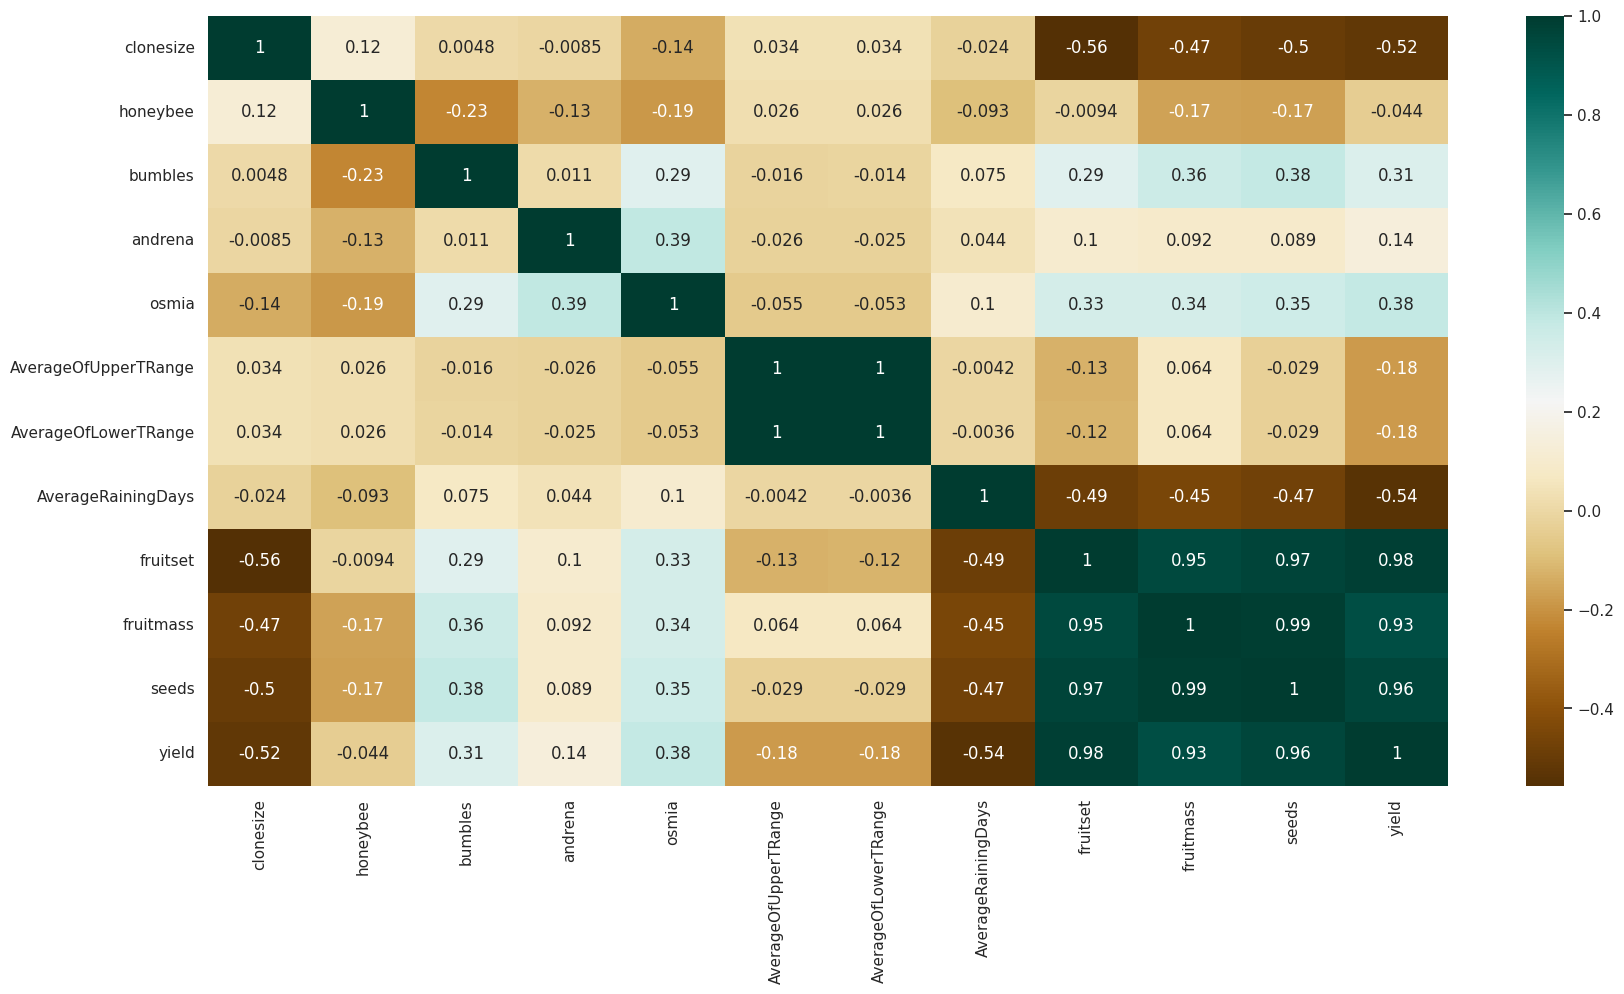

In [ ]:
# Adjusting the Size of Figure
plt.figure(figsize=(20,10))
# calculating the Correlation
correlation = df.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation

In [ ]:
df.shape
df.dtypes

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
AverageOfUpperTRange    float64
AverageOfLowerTRange    float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [ ]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,68.723037,48.613127,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,7.676984,5.417072,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,58.200000,41.200000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,64.700000,45.800000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,71.900000,50.800000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,71.900000,50.800000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,79.000000,55.900000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [ ]:
# Counting the number of Rows
df.count()

clonesize               777
honeybee                777
bumbles                 777
andrena                 777
osmia                   777
AverageOfUpperTRange    777
AverageOfLowerTRange    777
AverageRainingDays      777
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

In [ ]:
# checking null values or missing values
print(df.isnull().sum())

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
AverageOfUpperTRange    0
AverageOfLowerTRange    0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


<Axes: xlabel='clonesize'>

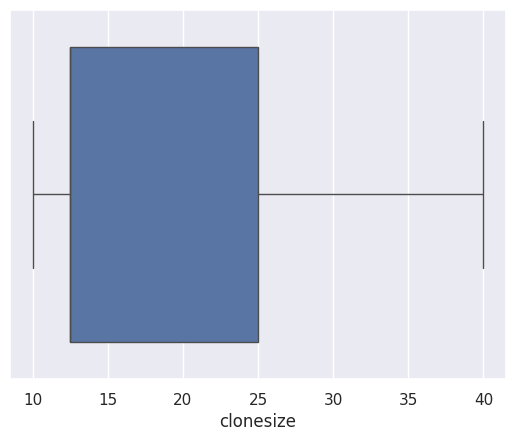

In [ ]:
# Detecting Outliers
sns.boxplot(x=df['clonesize'])

<Axes: xlabel='honeybee'>

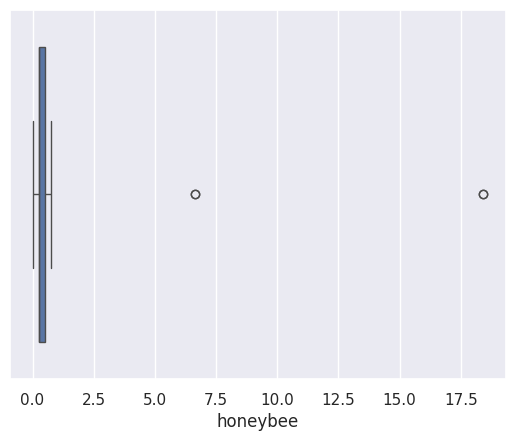

In [ ]:
sns.boxplot(x=df['honeybee'])

<Axes: xlabel='bumbles'>

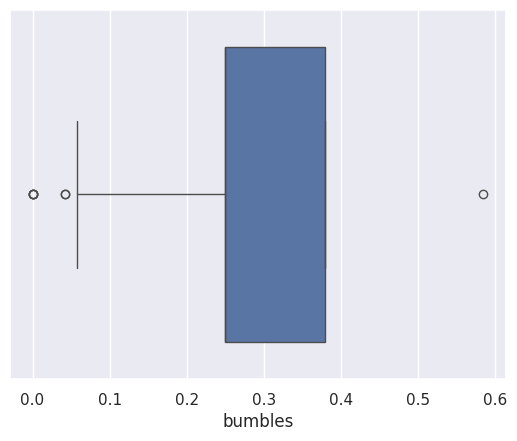

In [ ]:
sns.boxplot(x=df['bumbles'])

<Axes: xlabel='andrena'>

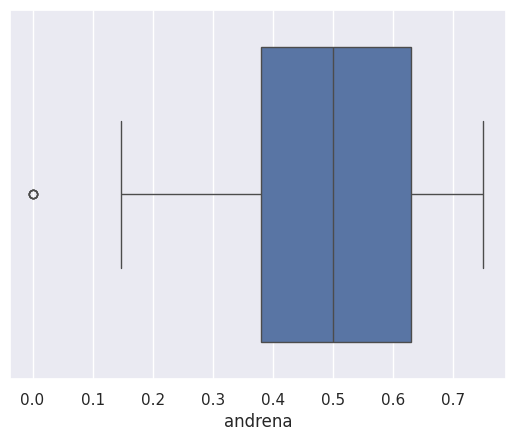

In [ ]:
sns.boxplot(x=df['andrena'])

<Axes: xlabel='osmia'>

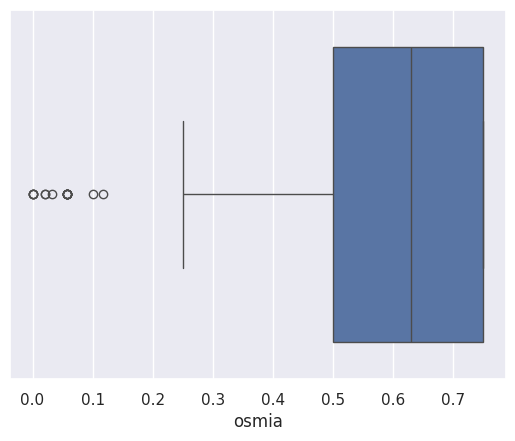

In [ ]:
sns.boxplot(x=df['osmia'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

clonesize                 12.500000
honeybee                   0.250000
bumbles                    0.130000
andrena                    0.250000
osmia                      0.250000
AverageOfUpperTRange       7.200000
AverageOfLowerTRange       5.000000
AverageRainingDays         0.290000
fruitset                   0.106571
fruitmass                  0.059869
seeds                      6.123577
yield                   1897.334830
dtype: float64


In [ ]:
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.033752,0.033566,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026365,0.025647,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.015821,-0.013985,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.025578,-0.025115,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.055441,-0.053141,0.104188,0.334178,0.336136,0.353116,0.380892
AverageOfUpperTRange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,1.000000,0.999923,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
AverageOfLowerTRange,0.033566,0.025647,-0.013985,-0.025115,-0.053141,0.999923,1.000000,-0.003626,-0.124784,0.064181,-0.028621,-0.181293
AverageRainingDays,-0.024455,-0.093477,0.075376,0.043739,0.104188,-0.004195,-0.003626,1.000000,-0.488809,-0.451837,-0.474528,-0.541215
fruitset,-0.556591,-0.009406,0.289890,0.102549,0.334178,-0.125082,-0.124784,-0.488809,1.000000,0.948193,0.966694,0.984081
fruitmass,-0.474038,-0.166419,0.358202,0.092470,0.336136,0.064034,0.064181,-0.451837,0.948193,1.000000,0.991270,0.930365


<Axes: title={'center': 'Feature-correlation (pearson)'}>

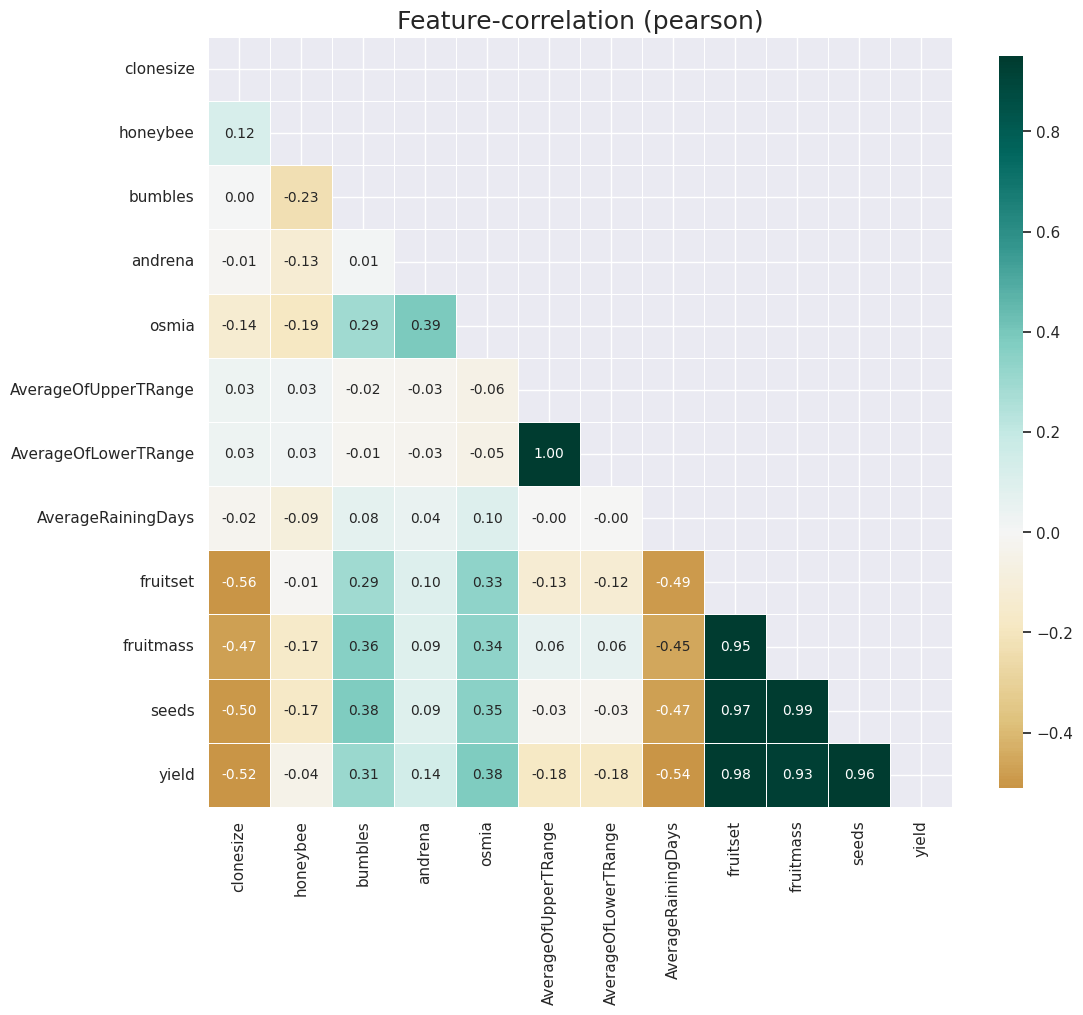

In [ ]:
import klib

klib.corr_plot(df)

                                             |          | [  0%]   00:00 -> (? left)


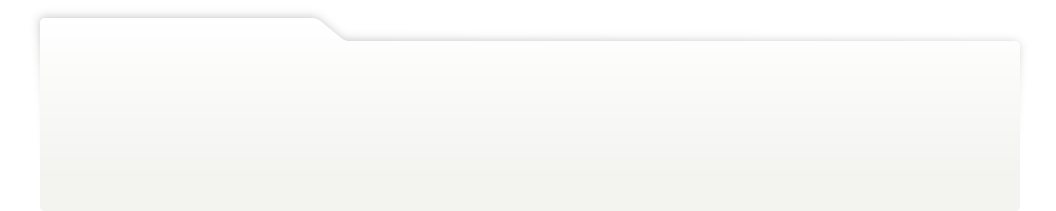
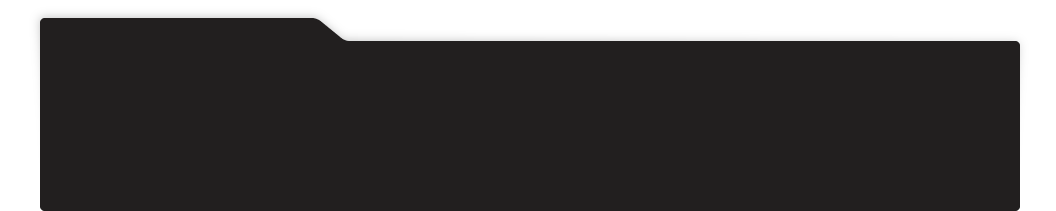
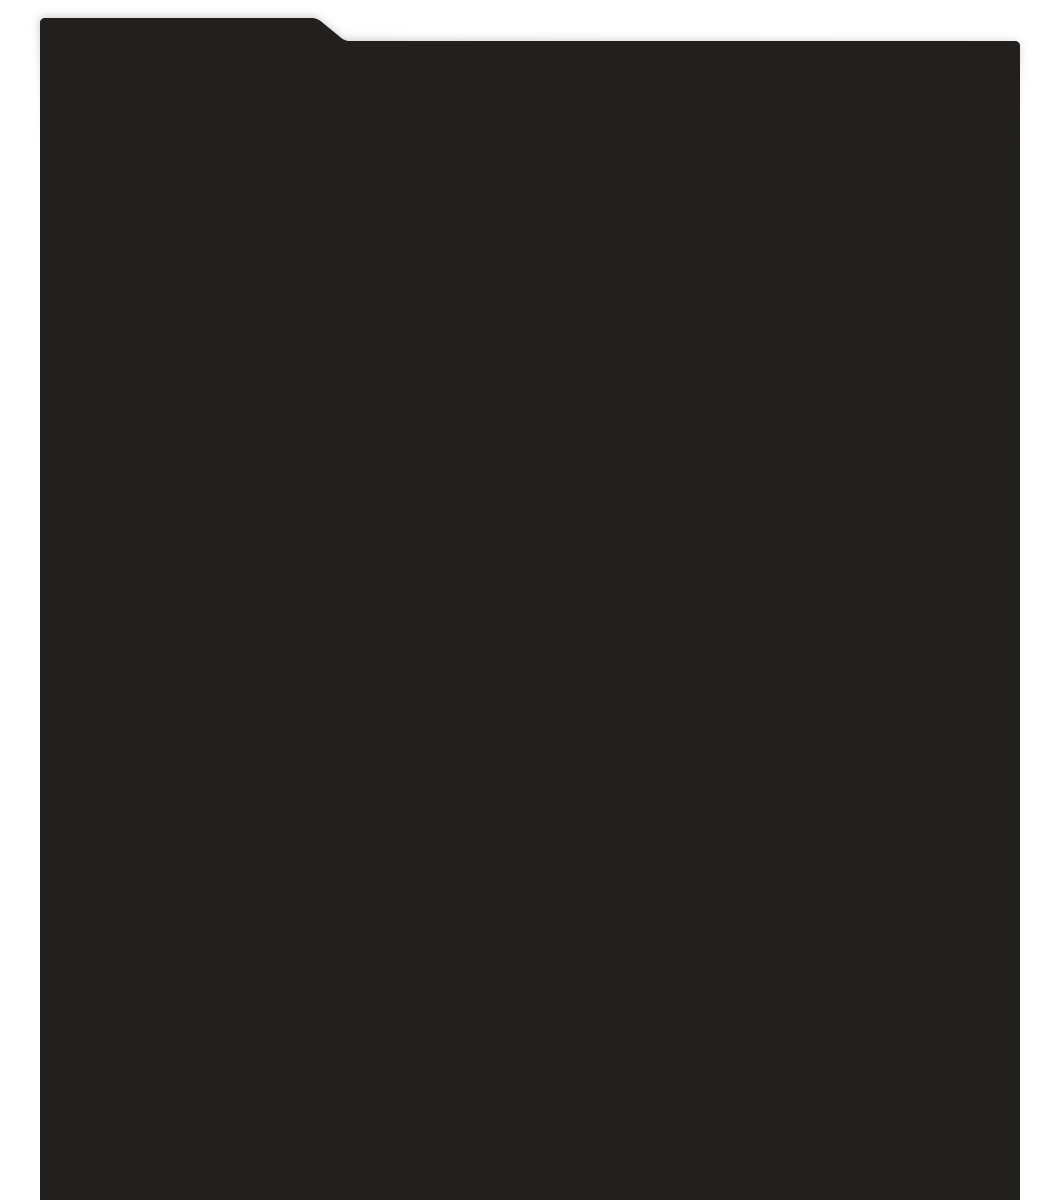
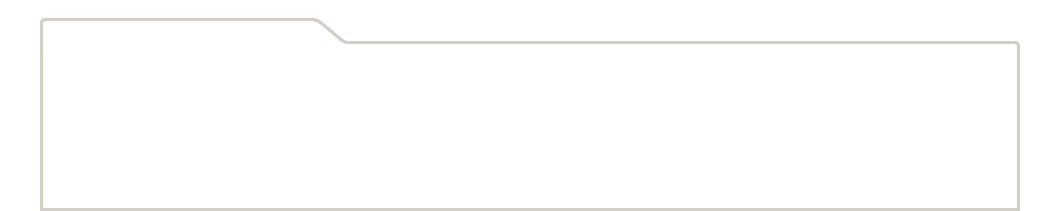
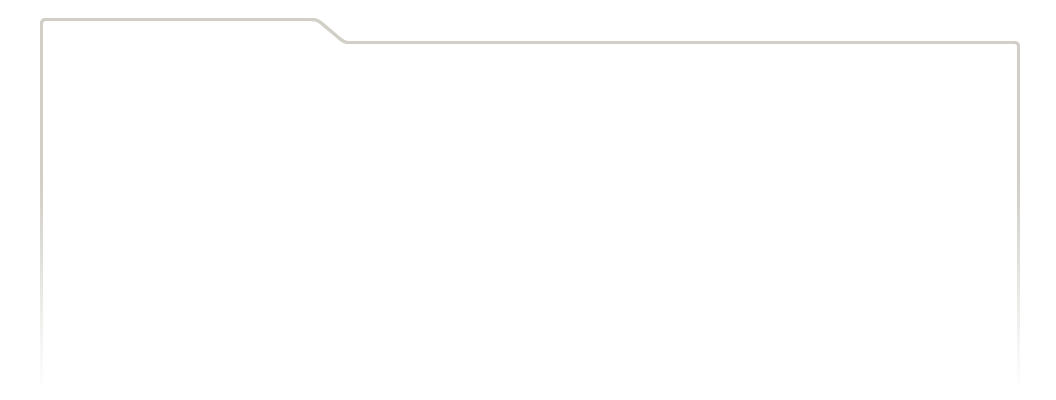
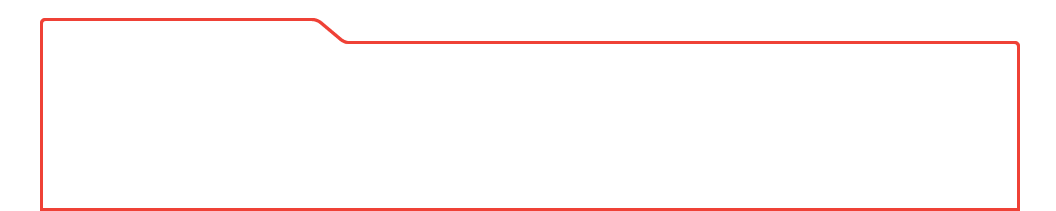
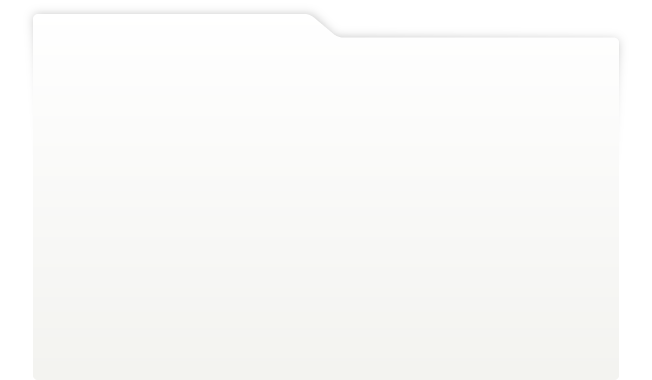
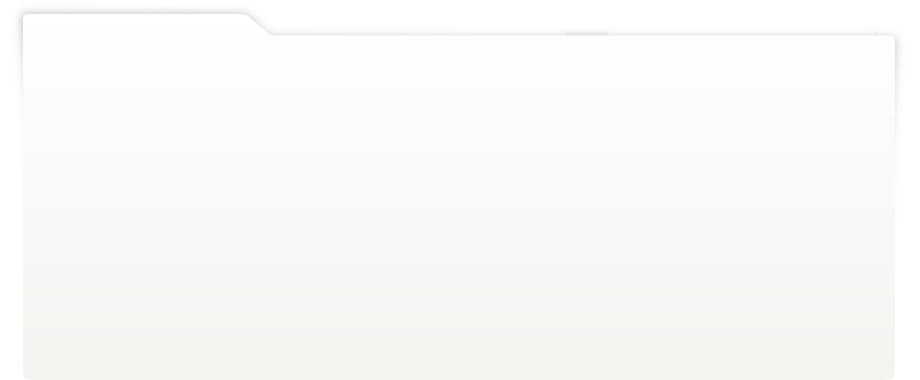
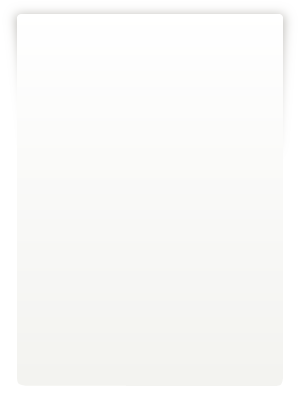
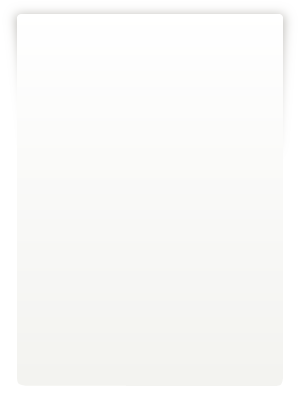
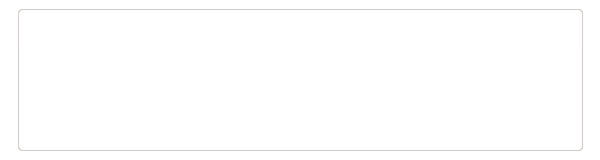
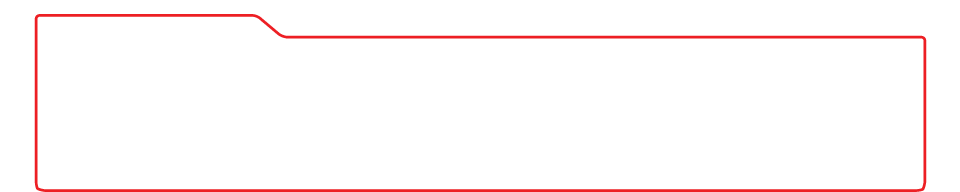
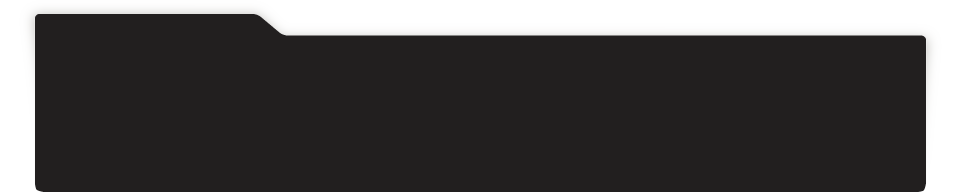
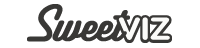
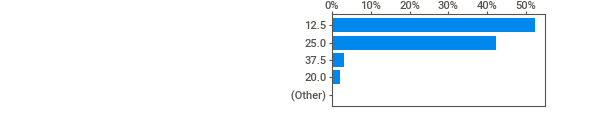
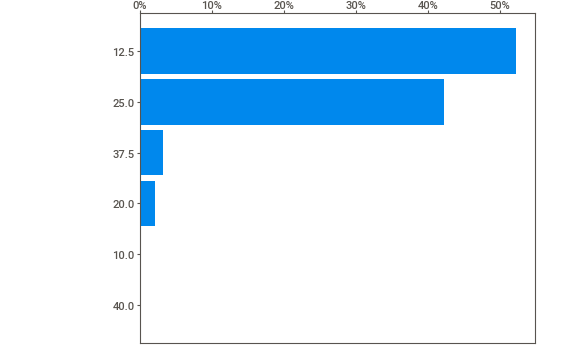
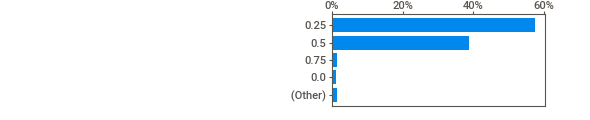
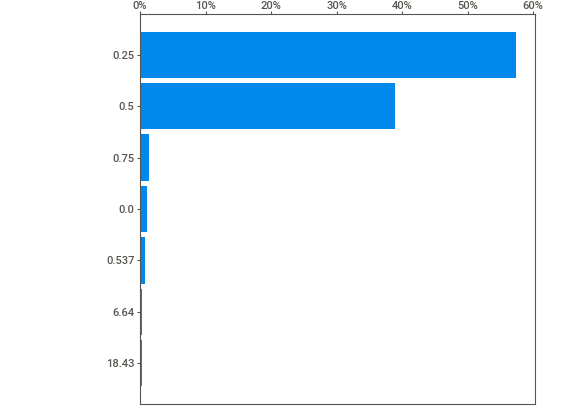
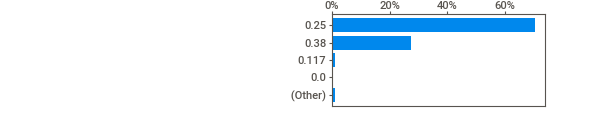
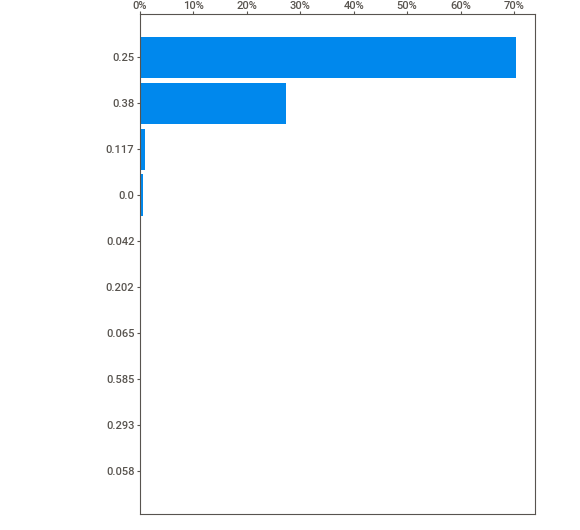
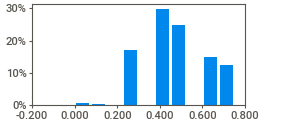
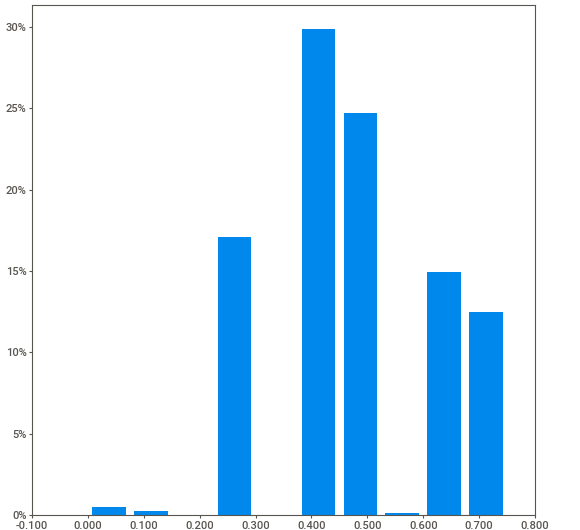
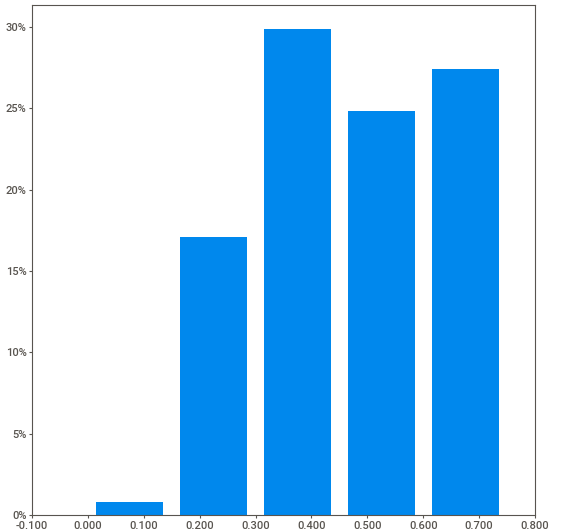
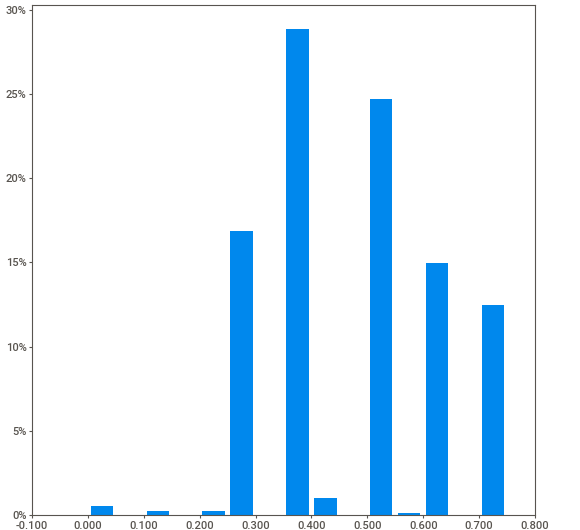
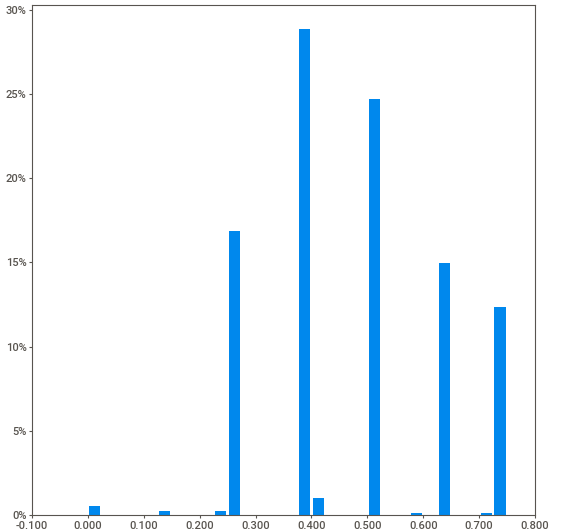
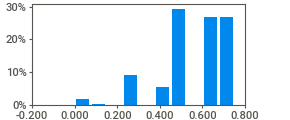
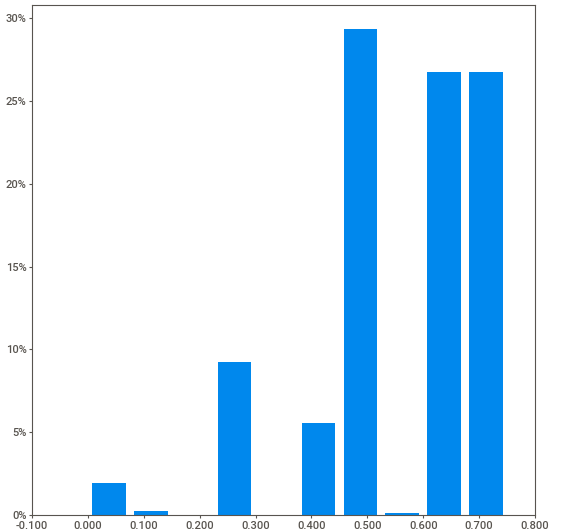
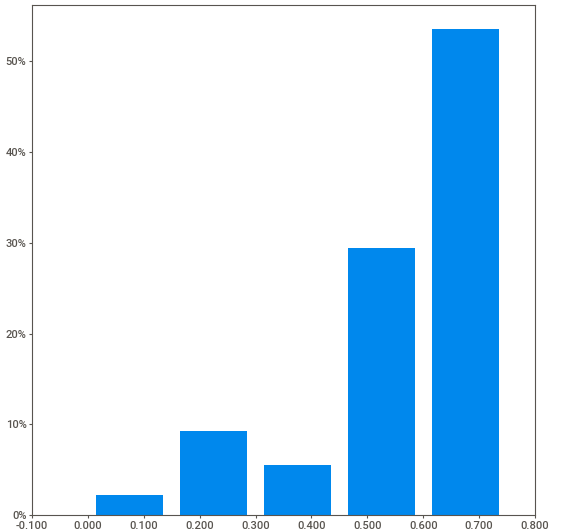
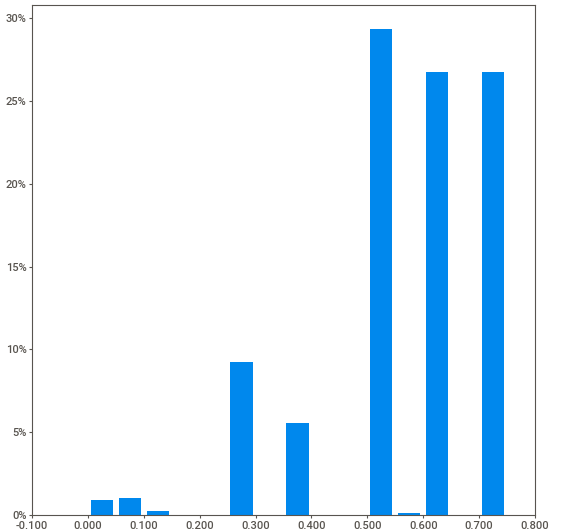
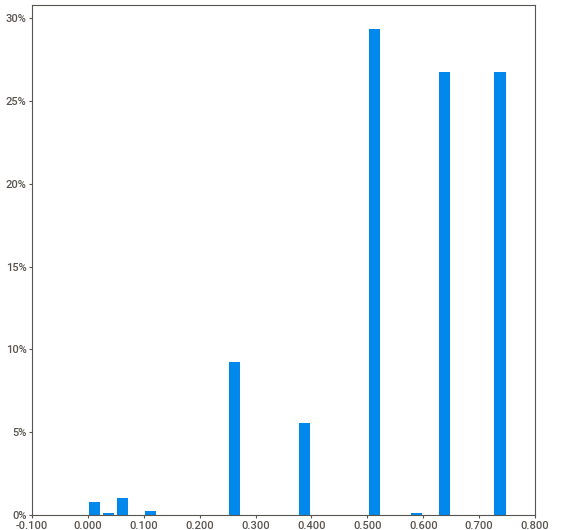
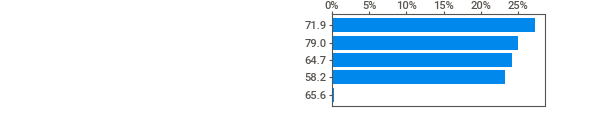
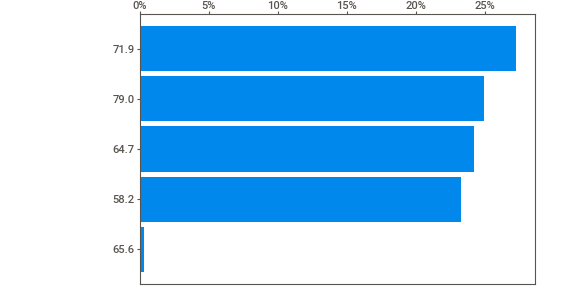
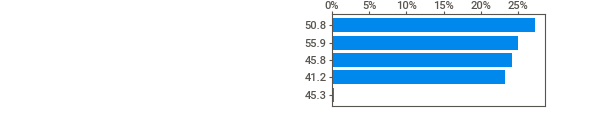
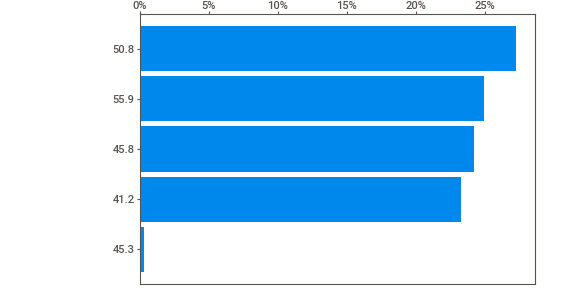
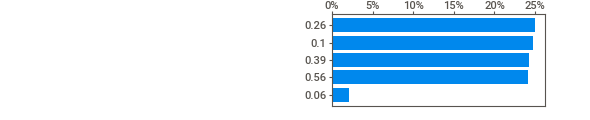
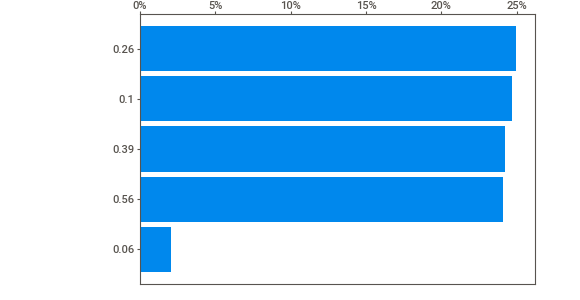
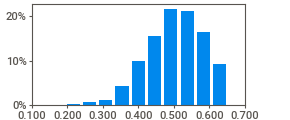
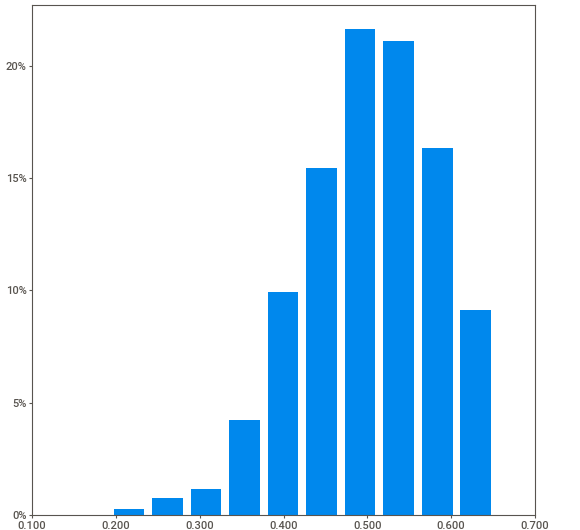
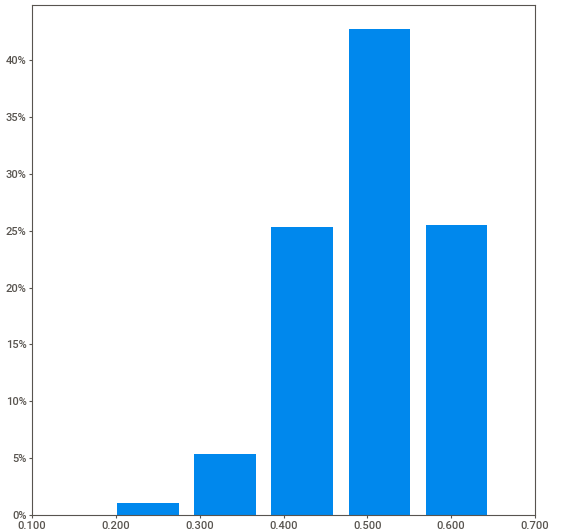
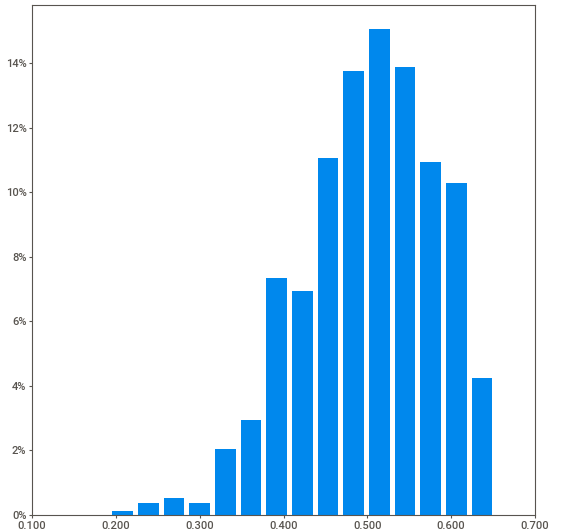
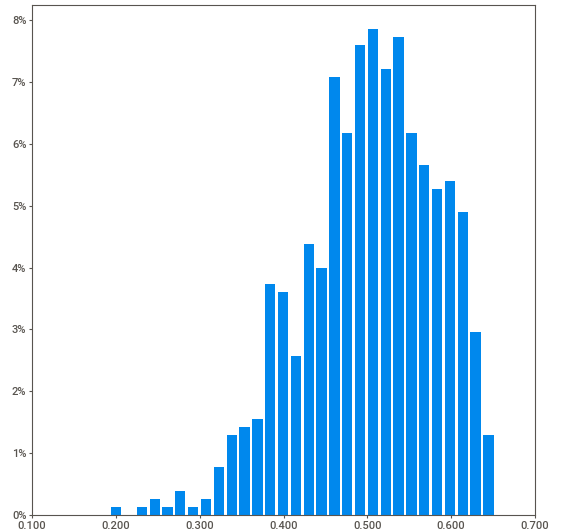
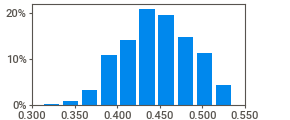
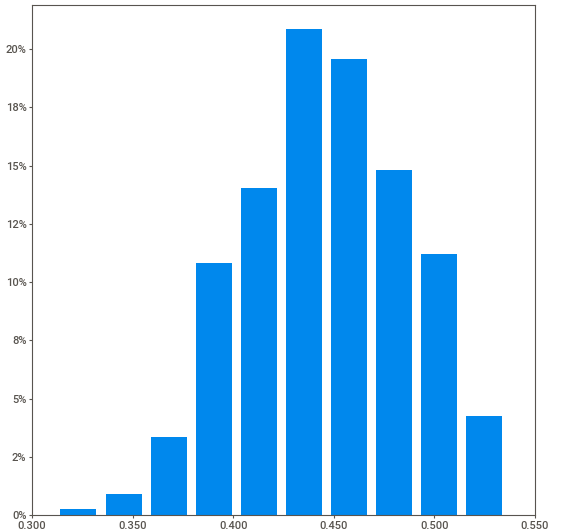
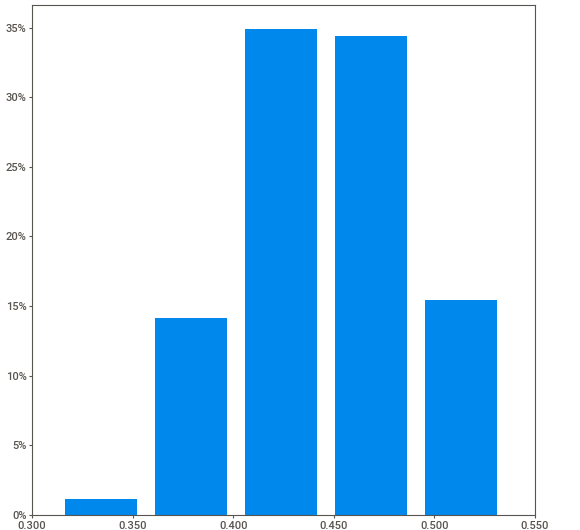
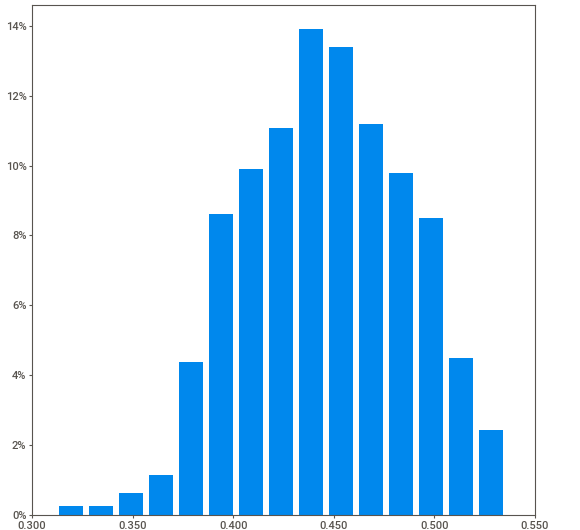
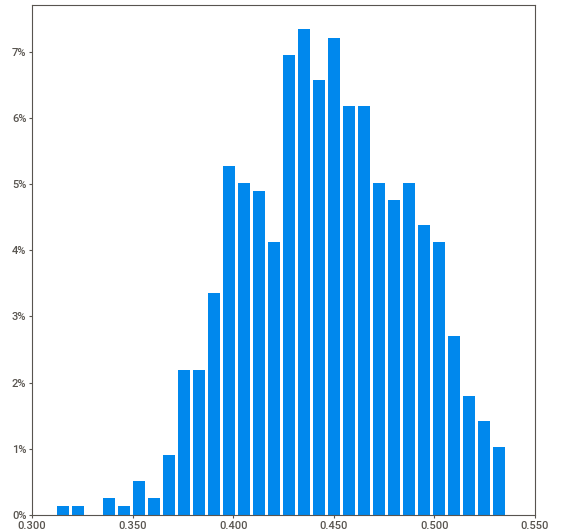
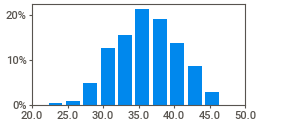
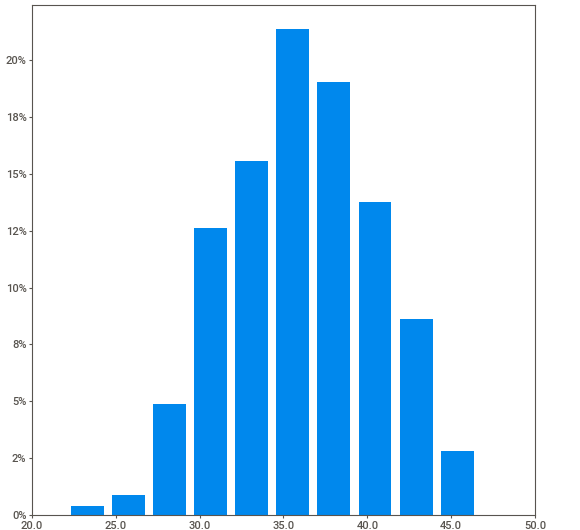
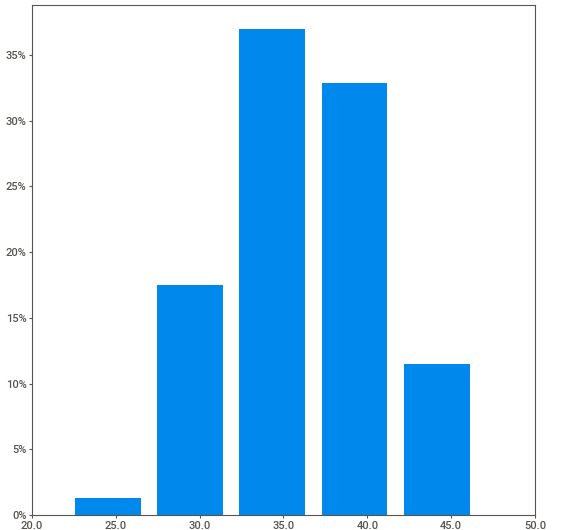
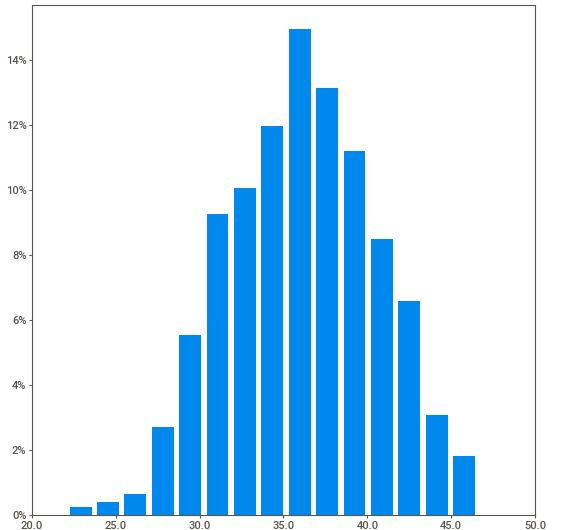
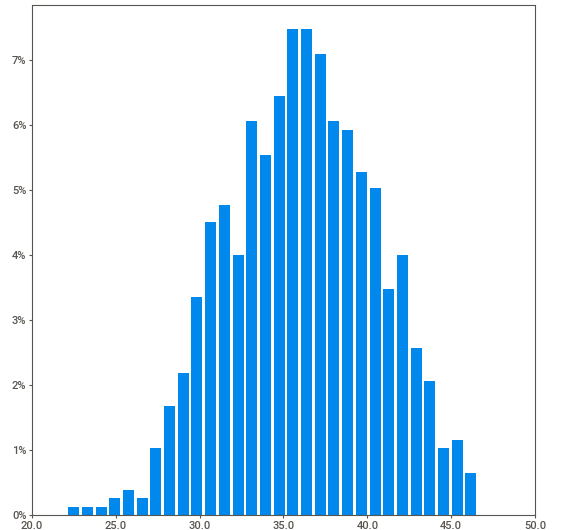
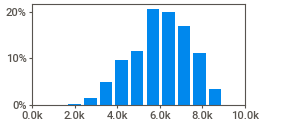
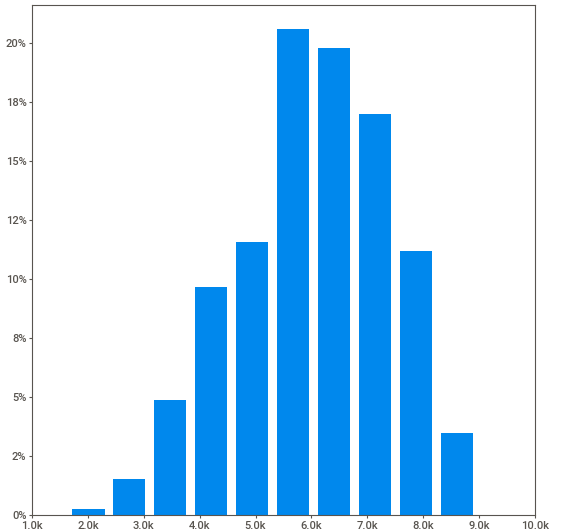
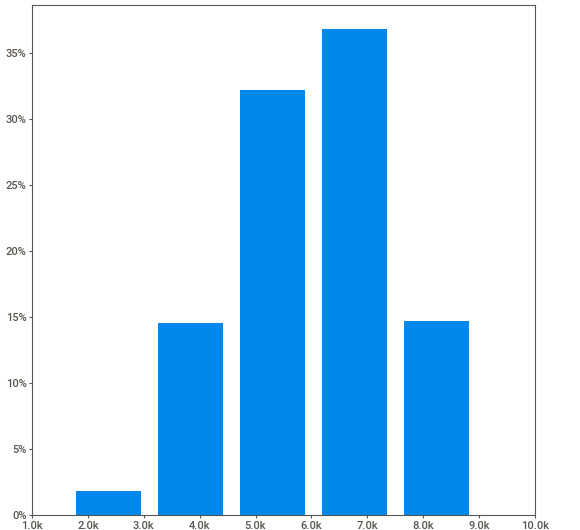
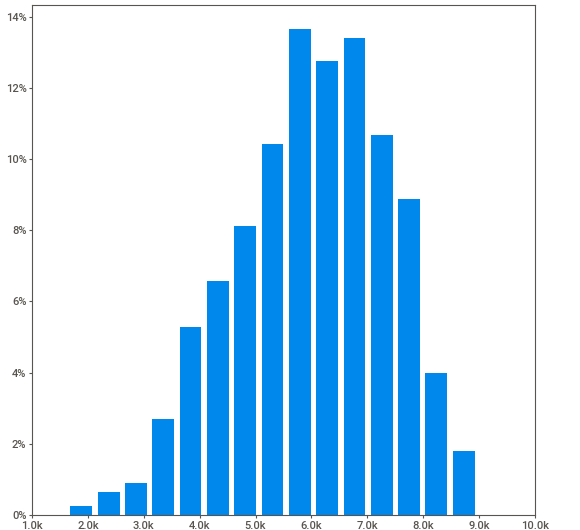
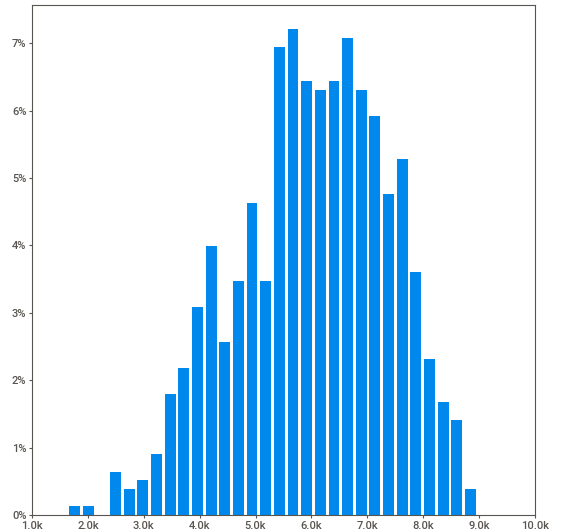
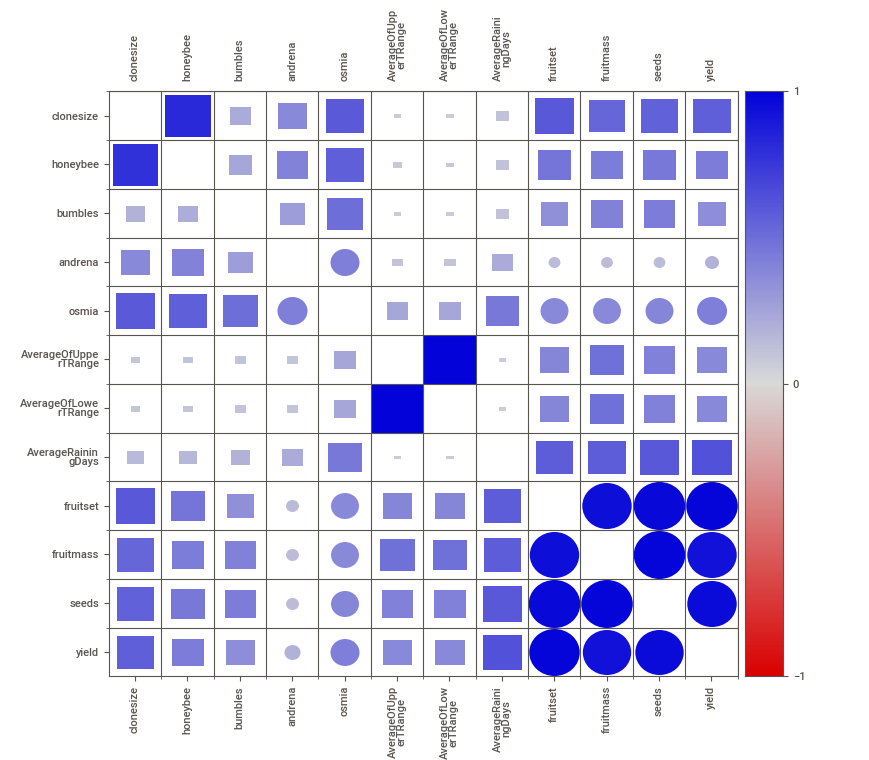
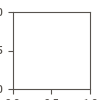

In [ ]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_notebook()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   AverageOfUpperTRange  777 non-null    float64
 6   AverageOfLowerTRange  777 non-null    float64
 7   AverageRainingDays    777 non-null    float64
 8   fruitset              777 non-null    float64
 9   fruitmass             777 non-null    float64
 10  seeds                 777 non-null    float64
 11  yield                 777 non-null    float64
dtypes: float64(12)
memory usage: 73.0 KB


# **Target Variable Splitting**

In [ ]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('yield', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = df['yield'] # y is the column we're trying to predict

In [ ]:
y # y represents the Target
y.shape

(777,)

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .10, random_state = 101)

# **Model Training**

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import make_pipeline


# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(78,)
[5996.18411934 6754.59723285 4492.84437116 6153.34810838 5494.05529489
 8169.08083488 3704.15493585 2912.84801934 7666.1058061  8383.36261965
 8015.98405322 4174.78464434 6852.27017004 7056.58110842 5604.86471908
 5241.33008621 5347.15373954 4844.62963726 6678.30461751 6653.83176024
 7284.98575458 3779.5465511  6864.4860378  7324.31934771 7053.91621443
 5730.54284129 7438.07282226 4243.09058127 7744.38514648 6348.00302744
 5033.23449736 4096.58115454 4962.16106505 5250.89380138 7834.85944057
 6856.93583116 4978.71122988 6718.88561768 7160.80060913 7479.19210115
 7999.78862132 3872.40275816 8682.07503865 8490.64848378 6865.73269144
 6485.70995009 5716.29441517 5335.41582718 5902.38806837 7479.04131977
 6489.14918289 6889.72032196 5580.46010984 4408.34451488 7815.07083137
 6498.79751517 7934.66959552 6411.80039588 8145.23357421 6921.59167183
 3615.23544939 4835.34323277 3914.88366141 5763.85280565 7465.57406715
 3668.01599758 5326.1346034  6930.9308836  7223.90662535 4612.25421737


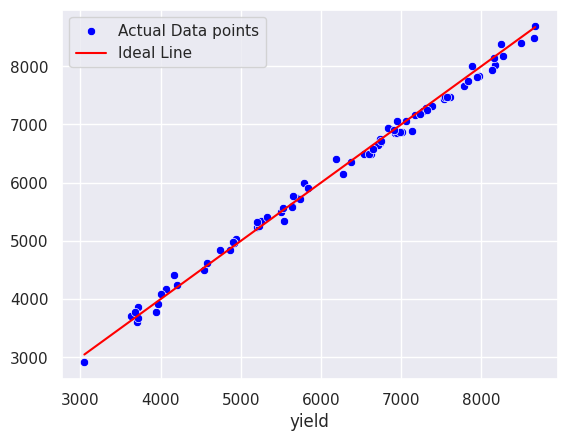

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
       5791.46 |       5996.18
       6731.71 |       6754.60
       4546.79 |       4492.84
       6274.93 |       6153.35
       5496.09 |       5494.06
       8263.29 |       8169.08
       3631.91 |       3704.15
       3049.26 |       2912.85
       7778.35 |       7666.11
       8247.52 |       8383.36
       8166.60 |       8015.98
       4062.74 |       4174.78
       6919.35 |       6852.27
       7064.17 |       7056.58
       5636.31 |       5604.86
       5199.53 |       5241.33
       5538.91 |       5347.15
       4865.40 |       4844.63
       6735.24 |       6678.30
       6708.24 |       6653.83
       7303.59 |       7284.99
       3937.92 |       3779.55
       7005.04 |       6864.49
       7381.38 |       7324.32
       6942.40 |       7053.92
       5695.56 |       5730.54
       7529.18 |       7438.07
       4201.44 |       4243.09
       7829.51 |       7744.39
       6376.66 |       6348.00
     

In [ ]:
#Residual Analysis
residual = actual- y_pred.reshape(-1)
print(residual)

[ 1239.59152566   481.17841215  2742.93127384  1082.42753662
  1741.72035011  -933.30518988  3531.62070915  4322.92762566
  -430.3301611  -1147.58697465  -780.20840822  3060.99100066
   383.50547496   179.19453658  1630.91092592  1994.44555879
  1888.62190546  2391.14600774   557.47102749   581.94388476
   -49.21010958  3456.2290939    371.2896072    -88.54370271
   181.85943057  1505.23280371  -202.29717726  2992.68506373
  -508.60950148   887.77261756  2202.54114764  3139.19449046
  2273.61457995  1984.88184362  -599.08379557   378.83981384
  2257.06441512   516.89002732    74.97503587  -243.41645615
  -764.01297632  3363.37288684 -1446.29939365 -1254.87283878
   370.04295356   750.06569491  1519.48122983  1900.35981782
  1333.38757663  -243.26567477   746.62646211   346.05532304
  1655.31553516  2827.43113012  -579.29518637   736.97812983
  -698.89395052   823.97524912  -909.45792921   314.18397317
  3620.54019561  2400.43241223  3320.89198359  1471.92283935
  -229.79842215  3567.75

<ipython-input-110-65ba806224c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, kde=True)


<Axes: ylabel='Density'>

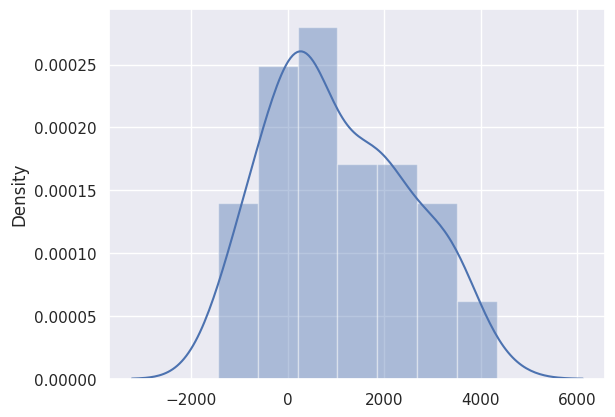

In [ ]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

# **Linear Regression**

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 10609.747218116307
Root Mean Squared Error: 103.00362720854206


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
rmse = np.sqrt(DTr)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)
print("Root Mean Squared Error:", rmse)

Decision Tree Regression :  48149.87750063121
Root Mean Squared Error: 219.43080344525745


# **Random Forest**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
rmse = np.sqrt(RFr)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)
print("Root Mean Squared Error:", rmse)

Random Forest Regression :  21157.881539621514
Root Mean Squared Error: 145.45749048990743


# **Gradient Boosting Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
rmse = np.sqrt(GBr)
print('Gradient Boosting Regression : ',GBr)
print("Root Mean Squared Error:", rmse)

Gradient Boosting Regression :  16187.606306814887
Root Mean Squared Error: 127.2305242731275


In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression RMSE":  103.00362720854206,
    "Descison RMSE": 219.43080344525745,
    "Random Forest RMSE": 145.45749048990743,
    "Gradient Boosting RMSE": 127.2305242731275
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. Linear Regression RMSE: 103.00362720854206
2. Gradient Boosting RMSE: 127.2305242731275
3. Random Forest RMSE: 145.45749048990743
4. Descison RMSE: 219.43080344525745


# **According to the study and collected data the ranges are given below and we cant remove outliers from the data that touch the Uper or Lower Range.**

Clone size1  m2 10–40 The average blueberry clone size in the field

Honeybee density bees/m2/min 0–18.43 Honeybee (Apis mellifera (L.)) density in the field

Bumblebee density bees/m2/min 0–0.585 Bumblebee (Bombus spp.) density in the field

Andrena density bees/m2/min 0–0.75 Andrena spp. bee density in the field

Osmia density bees/m2/min 0–0.75 Osmia spp. bee density in the field

Daily air temperature °F High, Moderate or Low The 125%, 100% or 75% of the average daily air temperature from Julian day of 121 and 181 of the past five
years (2015–2019)

Daily precipitation inch High, Moderate or Low The 125%, 100% or 75% of the average daily precipitation from Julian day of 121 and 181 of the past five years
(2015–2019)